In [33]:
# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
# upload dataset
df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")

In [35]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [37]:
# drop unecessary columns
df.drop(columns=['Age', 'Purchase Date', 'Product Category', 'Customer Name', 'Customer ID'], inplace=True)

In [38]:
# Using isnull and sum in pandas allows us to see the missing values we have in our entire dataset.
df.isnull().sum()

Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Gender                       0
Churn                        0
dtype: int64

In [39]:
# First we must imput the package in order to use the visualization tool.
!pip install missingno --quiet
import missingno as msno

<Axes: >

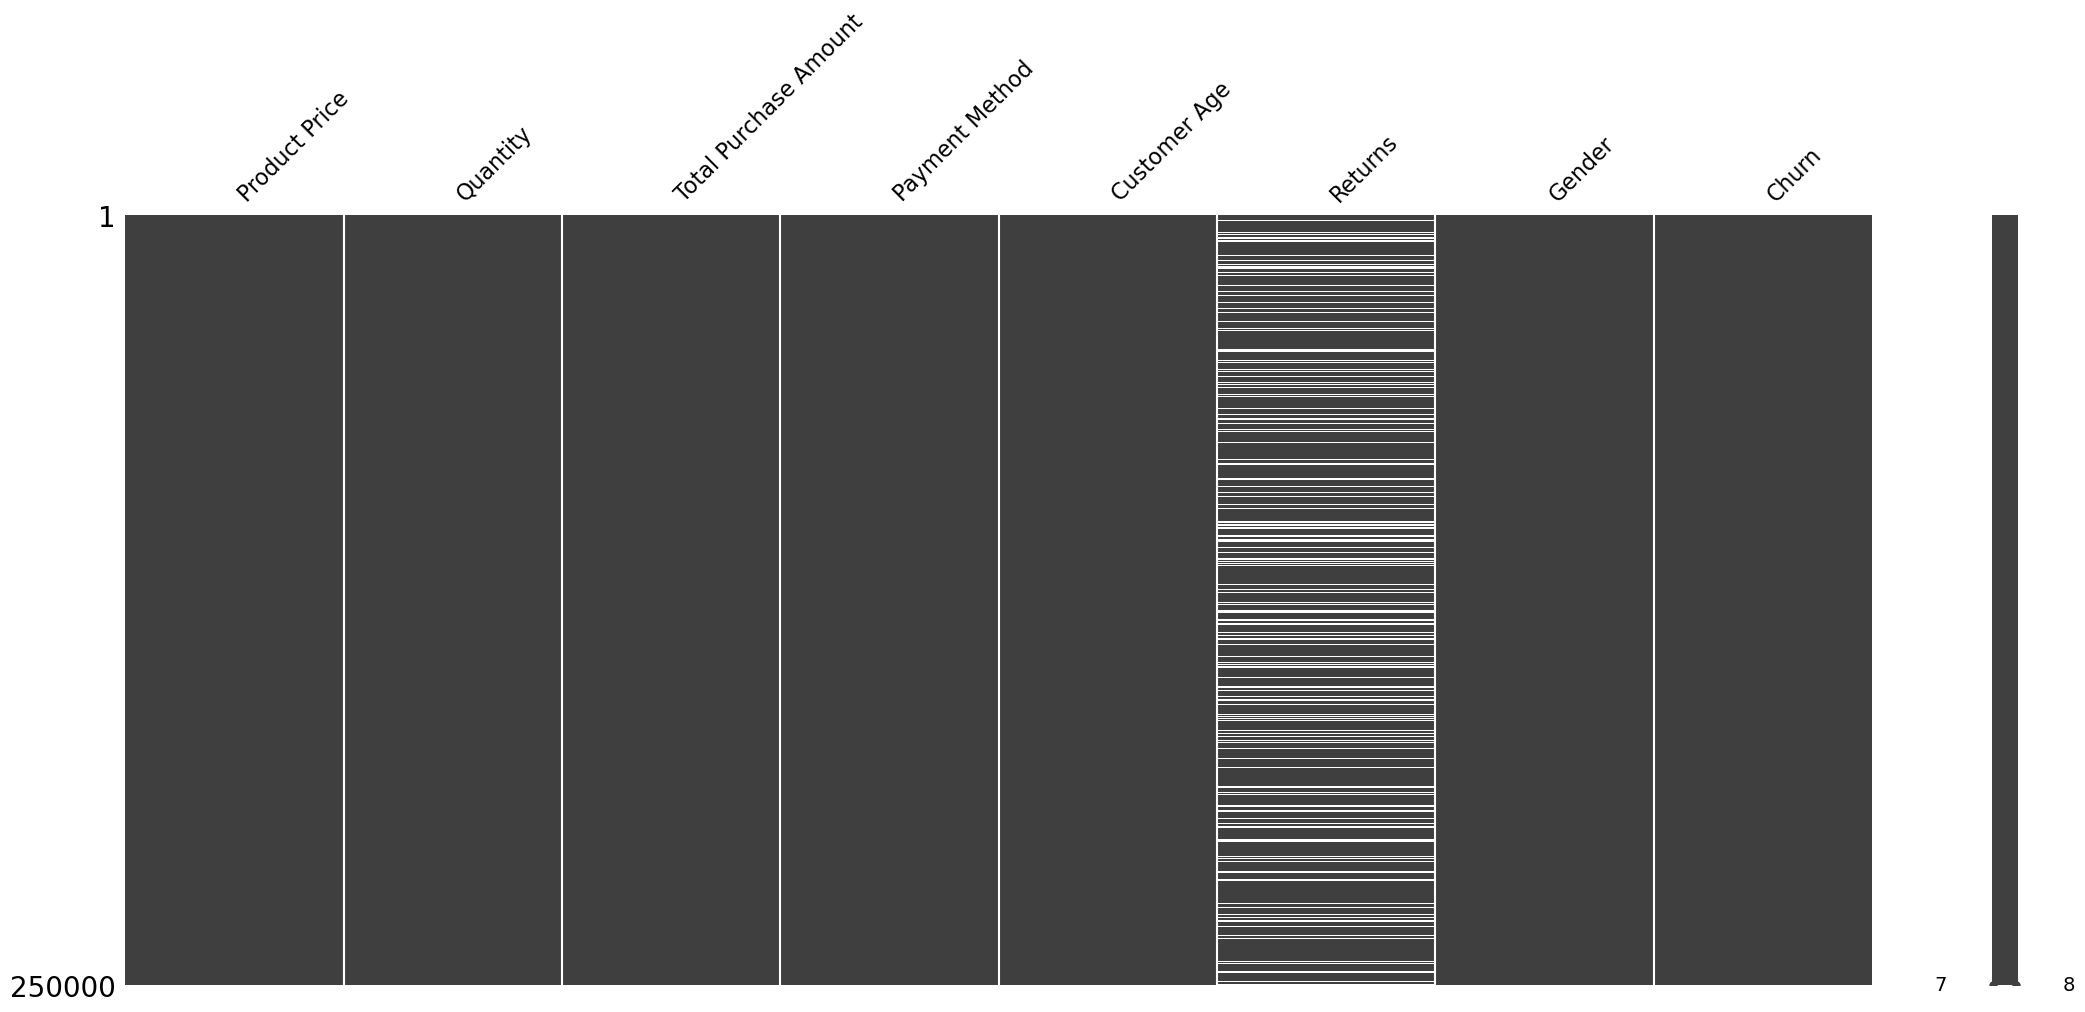

In [40]:
# Now that it's uploaded, we can go ahead and use Matrix View Function:
msno.matrix(df)

In [41]:
# Creates a copy of our data.
df_imputed = df.copy()

In [42]:
# This brings in our necesarry library:
from sklearn.impute import SimpleImputer

In [43]:
# First create a most_frequent imputer object.
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
# This fits our Data and Transforms it using most_frequent Imputer:
df_imputed['Returns'] = imputer_most_frequent.fit_transform(df_imputed['Returns'].values.reshape(-1,1))

In [44]:
# Check our new data set.
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Product Price          250000 non-null  int64  
 1   Quantity               250000 non-null  int64  
 2   Total Purchase Amount  250000 non-null  int64  
 3   Payment Method         250000 non-null  object 
 4   Customer Age           250000 non-null  int64  
 5   Returns                250000 non-null  float64
 6   Gender                 250000 non-null  object 
 7   Churn                  250000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 15.3+ MB


In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
# Initiliaze the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [47]:
# Select categorical columns
categorical_cols = df_imputed.select_dtypes(include=['object']).columns
categorical_cols

Index(['Payment Method', 'Gender'], dtype='object')

In [48]:
# Fit and Transform
encoded_cols = encoder.fit_transform(df[categorical_cols])
encoded_cols

array([[1., 0., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.]])

In [19]:
# Create a Dataframe
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df.head()

,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_Crypto,Payment Method_PayPal,Gender_Male
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [49]:
# Drop Original categorical columns
df_imputed_dropped = df_imputed.drop(categorical_cols, axis=1)

In [50]:
# Concatenate original with encoded
df_imputed_encoded = pd.concat([df_imputed_dropped, encoded_df], axis=1)

In [51]:
# Inspect the types
print(df_imputed_encoded.dtypes)

Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Customer Age                      int64
Returns                         float64
Churn                             int64
Product Category_Clothing       float64
Product Category_Electronics    float64
Product Category_Home           float64
Payment Method_Credit Card      float64
Payment Method_Crypto           float64
Payment Method_PayPal           float64
Gender_Male                     float64
dtype: object


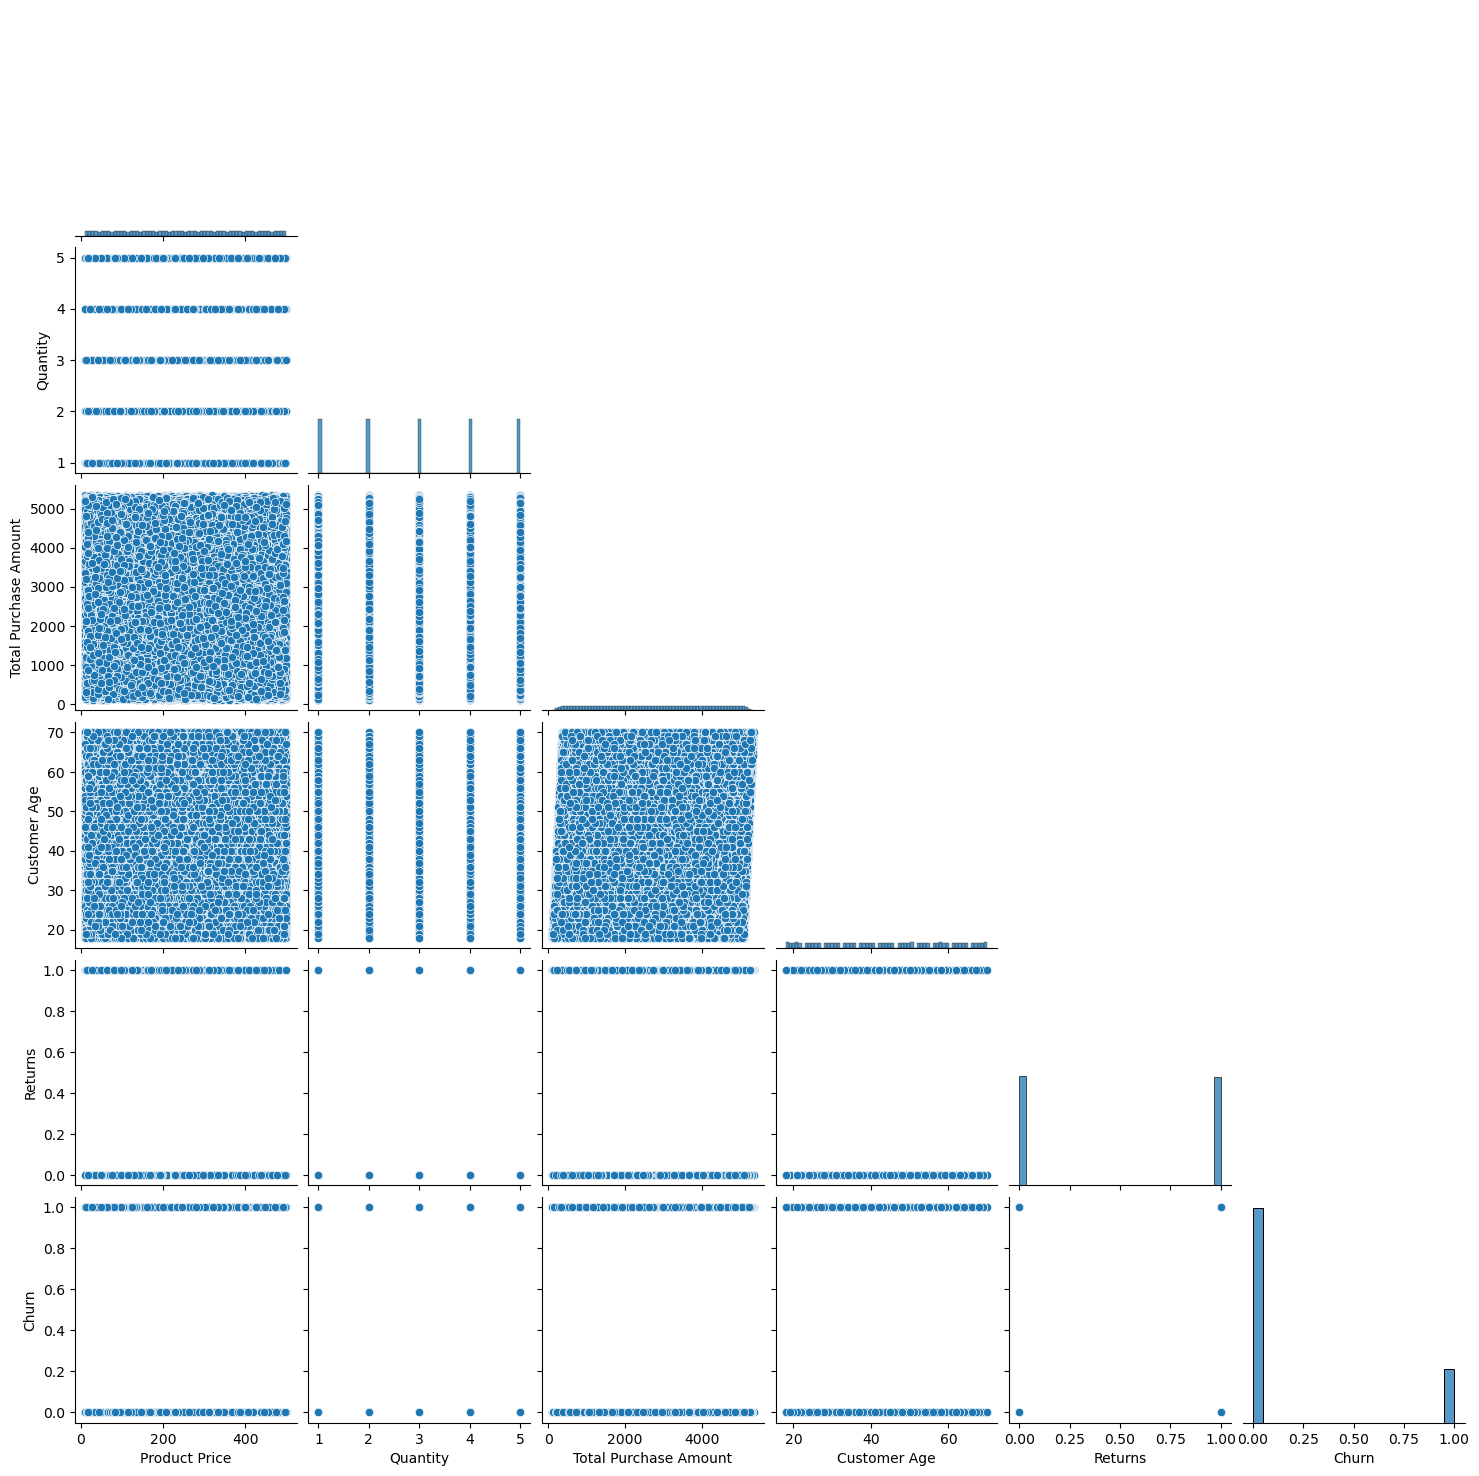

In [52]:
#Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Extract
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

#Pair plot
sns.pairplot(df[numerical_columns], corner=True)

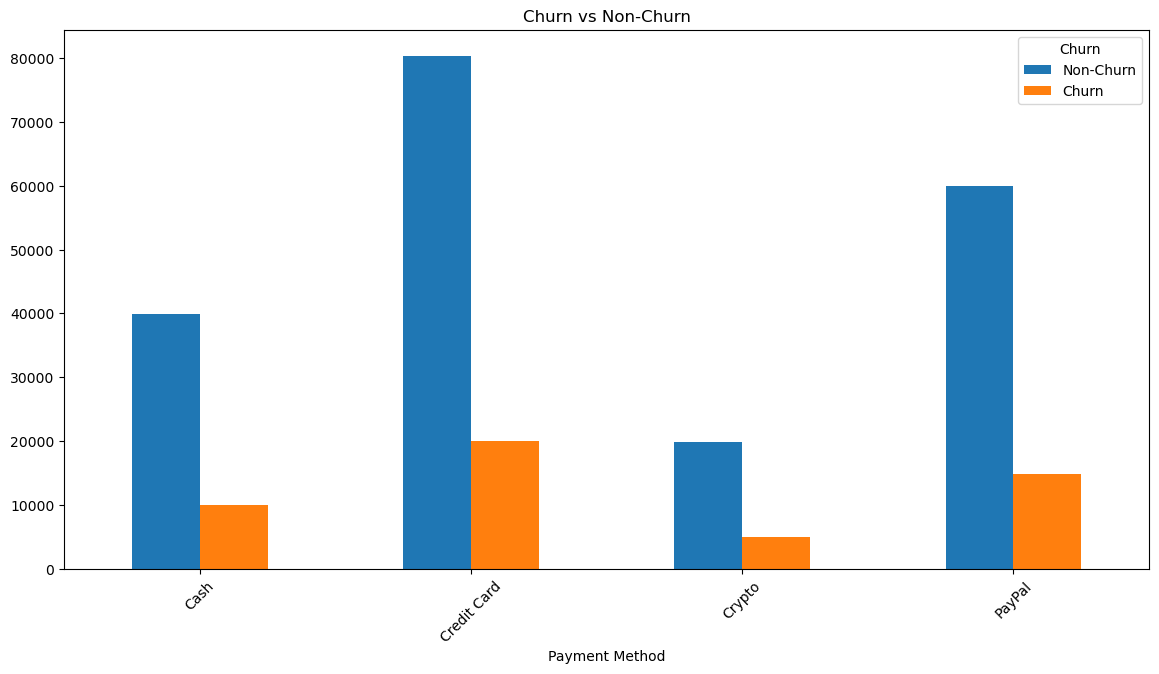

In [53]:
categories = df.groupby(['Payment Method', 'Churn']).size().unstack().fillna(0)
categories.plot(kind='bar', stacked=False, figsize=(14, 7))

plt.title('Churn vs Non-Churn')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])
plt.show()

In [57]:
# Drop Churn from X features
X = df_imputed_encoded.drop(["Churn"], axis=1)

# Our Target Variable
y = df_imputed_encoded['Churn']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Scale feature matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Import
from sklearn.linear_model import LogisticRegression

In [61]:
#Create Linear Regression Model & train it
lr_model = LogisticRegression()

In [62]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
y_pred = lr_model.predict(X_test_scaled)

In [64]:
# Import our classification
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     60052
           1       0.00      0.00      0.00     14948

    accuracy                           0.80     75000
   macro avg       0.40      0.50      0.44     75000
weighted avg       0.64      0.80      0.71     75000



In [65]:
# import our library
from sklearn.neighbors import KNeighborsClassifier

In [66]:
#Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [67]:
# Train the model using the training set
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [69]:
# Evaluating the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     60052
           1       0.20      0.06      0.09     14948

    accuracy                           0.77     75000
   macro avg       0.50      0.50      0.48     75000
weighted avg       0.68      0.77      0.71     75000

[[56606  3446]
 [14098   850]]


In [70]:
# import our library
from sklearn.tree import DecisionTreeClassifier

In [71]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

In [72]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
# Make predictions
y_pred_clf = clf.predict(X_test)

In [74]:
# Evaluate the model
print(classification_report(y_test, y_pred_clf))
print(confusion_matrix(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     60052
           1       0.20      0.22      0.21     14948

    accuracy                           0.66     75000
   macro avg       0.50      0.50      0.50     75000
weighted avg       0.68      0.66      0.67     75000

[[46530 13522]
 [11607  3341]]


In [75]:
## Because `KNN, Decision Tree, and Logistic Regression` offer different ways of analyzing customer behavior, they were useful in anticipating client `churn`. Modeling linear relationships is where logistic regression shines; it can show how different factors affect the risk of churn in a linear fashion. The strong linear patterns seen in the data are shown by this model's `high accuracy`, which offers important information for developing tactics that will effectively keep customers. With the combination of these models, we are able to improve the ability to predict customer churn.